In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
! python3 -m pip install --no-cache-dir xformers transformers[torch] ftfy datasets tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 252.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 230.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 326.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 283.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 308.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 303.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 304.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompati

In [ ]:
! accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [ ]:
!pip install rarfile
!pip install unrar


In [ ]:
!pip install RarFile

In [ ]:
import zipfile
import os
import rarfile

# Paths
zip_sketches_path = "/content/sketches_6k.zip"
sketches_dir = "/content/subset_sketches"

# Ensure the output directory exists
os.makedirs(sketches_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_sketches_path, 'r') as zip_ref:
    zip_ref.extractall(sketches_dir)

print(f"Extracted all files to {sketches_dir}")


# # Unzip subset_images
# rar_images_path = "/content/images.rar"
# images_dir = "/content/subset_images"

# with rarfile.RarFile(rar_images_path, 'r') as rar_ref:
#     rar_ref.extractall(images_dir)

# print("Extraction complete.")


Extracted all files to /content/subset_sketches


In [ ]:
import pandas as pd

# Load the CSV file
csv_path = "/content/metadata (2).csv"  # Update the path if necessary
metadata = pd.read_csv(csv_path)

# Display the first few rows to inspect its structure
metadata.head()

,Image Filename,Sketch Filename,Text Description
0,0.jpg,0.jpg,"The person has big lips, wavy hair, arched eye..."
1,1.jpg,1.jpg,"This person has arched eyebrows, wavy hair, an..."
2,10.jpg,10.jpg,"This man is chubby and has oval face, big nose..."
3,100.jpg,100.jpg,"This person is attractive and has wavy hair, b..."
4,1000.jpg,1000.jpg,"This man has double chin, bags under eyes, big..."


In [ ]:
metadata.shape

(6000, 3)

In [ ]:
print("Columns in CSV:", metadata.columns)

Columns in CSV: Index(['Image Filename', 'Sketch Filename', 'Text Description'], dtype='object')


In [ ]:
import os
import pandas as pd

# Paths to folders
base_sketch_path = "/content/subset_sketches/sketches/sketches/sketches"
base_image_path = "/content/subset_images/images"

# Load the CSV
csv_path = "/content/metadata (2).csv"
metadata = pd.read_csv(csv_path)

# Add full paths for sketches and images
metadata["sketch_file"] = metadata["Sketch Filename"].apply(lambda x: os.path.join(base_sketch_path, x))
metadata["face_file"] = metadata["Image Filename"].apply(lambda x: os.path.join(base_image_path, x))

# Inspect the updated DataFrame
metadata.head()

,Image Filename,Sketch Filename,Text Description,sketch_file,face_file
0,0.jpg,0.jpg,"The person has big lips, wavy hair, arched eye...",/content/subset_sketches/sketches/sketches/ske...,/content/subset_images/images/0.jpg
1,1.jpg,1.jpg,"This person has arched eyebrows, wavy hair, an...",/content/subset_sketches/sketches/sketches/ske...,/content/subset_images/images/1.jpg
2,10.jpg,10.jpg,"This man is chubby and has oval face, big nose...",/content/subset_sketches/sketches/sketches/ske...,/content/subset_images/images/10.jpg
3,100.jpg,100.jpg,"This person is attractive and has wavy hair, b...",/content/subset_sketches/sketches/sketches/ske...,/content/subset_images/images/100.jpg
4,1000.jpg,1000.jpg,"This man has double chin, bags under eyes, big...",/content/subset_sketches/sketches/sketches/ske...,/content/subset_images/images/1000.jpg


In [ ]:
from datasets import Dataset

# Convert to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(metadata)

# Inspect the dataset
print(hf_dataset)
print(hf_dataset[0])  # First example

Dataset({
    features: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file'],
    num_rows: 6000
})
{'Image Filename': '0.jpg', 'Sketch Filename': '0.jpg', 'Text Description': 'The person has big lips, wavy hair, arched eyebrows, high cheekbones, bags under eyes, brown hair, mouth slightly open, and pointy nose. She is wearing heavy makeup.', 'sketch_file': '/content/subset_sketches/sketches/sketches/sketches/0.jpg', 'face_file': '/content/subset_images/images/0.jpg'}


In [ ]:
from datasets import DatasetDict

# Split the dataset (80% train, 20% test)
split_dataset = hf_dataset.train_test_split(test_size=0.2, seed=42)

# Create a DatasetDict
final_dataset = DatasetDict({
    "train": split_dataset["train"],
    "test": split_dataset["test"],
})

# Inspect the splits
print("Train examples:", len(final_dataset["train"]))
print("Test examples:", len(final_dataset["test"]))

Train examples: 4800
Test examples: 1200


In [ ]:
# Save the dataset to disk
output_path = "./processed_subset_dataset"
final_dataset.save_to_disk(output_path)

print(f"Dataset saved to {output_path}")

Saving the dataset (0/1 shards):   0%|          | 0/4800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Dataset saved to ./processed_subset_dataset


In [ ]:
from datasets import load_from_disk

dataset = load_from_disk("./processed_subset_dataset")

# Inspect the dataset
print(dataset)
print("Train dataset size:", len(dataset["train"]))
print("Test dataset size:", len(dataset["test"]))


DatasetDict({
    train: Dataset({
        features: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file'],
        num_rows: 4800
    })
    test: Dataset({
        features: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file'],
        num_rows: 1200
    })
})
Train dataset size: 4800
Test dataset size: 1200


In [ ]:
! export BASE_MODEL=stabilityai/stable-diffusion-xl-base-1.0
! export DATASET=./processed_subset_dataset
! export TUNED_MODEL=./tunedxl_model

In [ ]:
pip install triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 9.3 MB/s eta 0:00:00


In [ ]:
pip install --upgrade git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-eivlse_2
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-eivlse_2
  Resolved https://github.com/huggingface/diffusers.git to commit 8a450c3da0b6a8aca1c36a4f3ea7f0096033cf56
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2991532 sha256=89b66c729a9b6a4ad2054082db5648de0c77011b0bbd11c8bbceb2e391eb220d
  Stored in directory: /tmp/pip-ephem-wheel-cache-twi8o49q/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


In [ ]:
%env TF_ENABLE_ONEDNN_OPTS=0

env: TF_ENABLE_ONEDNN_OPTS=0


In [ ]:
from datasets import load_from_disk
dataset = load_from_disk('./processed_subset_dataset')
print(dataset['train'][0])  # Replace 'train' with the correct split if necessary

{'Image Filename': '11063.jpg', 'Sketch Filename': '11063.jpg', 'Text Description': 'This person has double chin, bushy eyebrows, big nose, goatee, black hair, sideburns, and straight hair. He is young. He has beard.', 'sketch_file': '/content/subset_sketches/sketches/sketches/sketches/11063.jpg', 'face_file': '/content/subset_images/images/11063.jpg'}


In [ ]:
import os

missing_sketches = metadata[~metadata["sketch_file"].apply(os.path.exists)]
missing_faces = metadata[~metadata["face_file"].apply(os.path.exists)]

print(f"Missing sketches: {len(missing_sketches)}")
print(f"Missing faces: {len(missing_faces)}")

if not missing_sketches.empty:
    print(missing_sketches.head())

if not missing_faces.empty:
    print(missing_faces.head())


Missing sketches: 0
Missing faces: 0


In [ ]:
!pip install datasets

In [ ]:
from datasets import load_from_disk  # Import load_from_disk instead of load_dataset

dataset = load_from_disk("processed_subset_dataset")  # Load the saved dataset

In [ ]:
from datasets import load_from_disk

dataset_path = "processed_subset_dataset"
dataset = load_from_disk(dataset_path)

# Inspect train dataset
print(dataset["train"][0])  # Print the first sample


{'Image Filename': '11063.jpg', 'Sketch Filename': '11063.jpg', 'Text Description': 'This person has double chin, bushy eyebrows, big nose, goatee, black hair, sideburns, and straight hair. He is young. He has beard.', 'sketch_file': '/content/subset_sketches/sketches/sketches/sketches/11063.jpg', 'face_file': '/content/subset_images/images/11063.jpg'}


In [ ]:
from datasets import load_from_disk

# Load your dataset
dataset_path = "processed_subset_dataset"
dataset = load_from_disk(dataset_path)

# Function to rename keys
def rename_keys(example):
    return {
        "sketch_file": example["Sketch Filename"],  # Map to 'sketch_file'
        "description": example["Text Description"],  # Map to 'description'
        "face_file": example["Image Filename"],  # Map to 'face_file'
    }

# Apply the renaming to all splits
dataset = dataset.map(rename_keys)

# Save the updated dataset
dataset.save_to_disk("processed_subset_dataset_updated")


Map:   0%|          | 0/4800 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

In [ ]:
!ls -R processed_subset_dataset


processed_subset_dataset:
dataset_dict.json  test  train

processed_subset_dataset/test:
data-00000-of-00001.arrow  dataset_info.json  state.json

processed_subset_dataset/train:
data-00000-of-00001.arrow  dataset_info.json  state.json


In [ ]:
ls -R processed_subset_dataset


processed_subset_dataset:
dataset_dict.json  test/  train/

processed_subset_dataset/test:
cache-d6cd0d55f9908542.arrow  data-00000-of-00001.arrow  state.json
cache-f7da061ec7dd1e6b.arrow  dataset_info.json

processed_subset_dataset/train:
cache-038e59af4fbafd10.arrow  data-00000-of-00001.arrow  state.json
cache-a1d4e05782d2952b.arrow  dataset_info.json


In [ ]:
import os
import json

output_dir = "./image_folder_dataset"
os.makedirs(f"{output_dir}/train", exist_ok=True)
os.makedirs(f"{output_dir}/test", exist_ok=True)

for split in ["train", "test"]:
    metadata = []
    for i, row in enumerate(dataset[split]):
        sketch_path = f"{output_dir}/{split}/sketch_{i}.jpg"
        face_path = f"{output_dir}/{split}/face_{i}.jpg"
        os.symlink(row["sketch_file"], sketch_path)
        os.symlink(row["face_file"], face_path)
        metadata.append({"file_name": sketch_path, "edited_image": face_path, "edit_prompt": row["Text Description"]})
    with open(f"{output_dir}/{split}/metadata.jsonl", "w") as f:
        for item in metadata:
            f.write(json.dumps(item) + "\n")


In [ ]:
import logging


logging.basicConfig(level=logging.INFO)  # Set the logging level to INFO
logger = logging.getLogger(__name__)
print("Train split size:", len(dataset["train"]))
print("Columns in train split:", dataset["train"].column_names)
for row in dataset["train"]:
    print(row)
    break
# Before loading dataset
# logger.info(f"Loading dataset from {args.train_data_dir}")

# # Before loading dataset#
# logger.info(f"Loading dataset from {args.train_data_dir}") # Assuming args.train_data_dir is defined

# After loading dataset
logger.info(f"Dataset loaded successfully: {dataset}")
logger.info(f"Train split size: {len(dataset['train'])}")
logger.info(f"Columns in train split: {dataset['train'].column_names}")


Train split size: 4800
Columns in train split: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file']
{'Image Filename': '11063.jpg', 'Sketch Filename': '11063.jpg', 'Text Description': 'This person has double chin, bushy eyebrows, big nose, goatee, black hair, sideburns, and straight hair. He is young. He has beard.', 'sketch_file': '/content/subset_sketches/sketches/sketches/sketches/11063.jpg', 'face_file': '/content/subset_images/images/11063.jpg'}


In [ ]:
! accelerate launch --mixed_precision="fp16" \
    ./train_instruct_pix2pix_sdxl.py \
    --pretrained_model_name_or_path=stabilityai/stable-diffusion-xl-base-1.0 \
    --train_data_dir=processed_subset_dataset \
    --output_dir=./tuned_model \
    --resolution=512 \
    --train_batch_size=2 \
    --gradient_accumulation_steps=4 \
    --gradient_checkpointing \
    --max_train_steps=3000 \
    --checkpointing_steps=100 \
    --checkpoints_total_limit=2 \
    --learning_rate=5e-05 \
    --max_grad_norm=1.0 \
    --lr_warmup_steps=50 \
    --conditioning_dropout_prob=0.1 \
    --seed=42 \
    --original_image_column="sketch_file" \
    --edit_prompt_column="Text Description" \
    --edited_image_column="face_file"


2024-12-04 13:55:52.169661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 13:55:52.190490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 13:55:52.196832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 13:55:52.211719: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-04 13:55:53.421846: W ten

In [ ]:
from datasets import load_from_disk

dataset_path = "./processed_subset_dataset"
dataset = load_from_disk(dataset_path)

print("Dataset structure:", dataset)
print("Train split size:", len(dataset["train"]))
print("Test split size:", len(dataset["test"]))
print("Train columns:", dataset["train"].column_names)


Dataset structure: DatasetDict({
    train: Dataset({
        features: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file'],
        num_rows: 4800
    })
    test: Dataset({
        features: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file'],
        num_rows: 1200
    })
})
Train split size: 4800
Test split size: 1200
Train columns: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file']


In [ ]:
!ls -R processed_subset_dataset
for row in dataset["train"]:
    assert os.path.exists(row["sketch_file"]), f"Missing sketch file: {row['sketch_file']}"
    assert os.path.exists(row["face_file"]), f"Missing face file: {row['face_file']}"
for row in dataset["train"]:
    assert row["Text Description"], "Empty description found!"


processed_subset_dataset:
dataset_dict.json  test  train

processed_subset_dataset/test:
cache-d6cd0d55f9908542.arrow  data-00000-of-00001.arrow  state.json
cache-f7da061ec7dd1e6b.arrow  dataset_info.json

processed_subset_dataset/train:
cache-038e59af4fbafd10.arrow  data-00000-of-00001.arrow  state.json
cache-a1d4e05782d2952b.arrow  dataset_info.json


In [ ]:
import os

# Check for missing files in the 'train' split
missing_sketches = []
missing_faces = []
for row in dataset["train"]:
    if not os.path.exists(row["sketch_file"]):
        missing_sketches.append(row["sketch_file"])
    if not os.path.exists(row["face_file"]):
        missing_faces.append(row["face_file"])

print(f"Missing sketch files: {len(missing_sketches)}")
print(f"Missing face files: {len(missing_faces)}")

if missing_sketches:
    print("Example missing sketch files:", missing_sketches[:5])
if missing_faces:
    print("Example missing face files:", missing_faces[:5])


Missing sketch files: 0
Missing face files: 0


In [ ]:
missing_descriptions = [row for row in dataset["train"] if not row["Text Description"] or not row["Text Description"].strip()]
print(f"Missing descriptions: {len(missing_descriptions)}")
if missing_descriptions:
    print("Example rows with missing descriptions:", missing_descriptions[:5])
print("Columns in train dataset:", dataset["train"].column_names)


Missing descriptions: 0
Columns in train dataset: ['Image Filename', 'Sketch Filename', 'Text Description', 'sketch_file', 'face_file']


In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "/content/tuned_model"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
from PIL import Image



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Load the image properly
image_path = "/content/648.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A young woman with brown hair and small eyes with makeup around them. Her nose is small and her lips are thin. She is smiling and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.8, guidance_scale=30).images

# Save the generated image
images[0].save("OUTPUT1.png")

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Load the image properly
image_path = "/content/648.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A young woman with brown hair and small eyes with makeup around them. Her nose is small and her lips are thin. She is smiling and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.4, guidance_scale=25).images

# Save the generated image
images[0].save("OUTPUT1.png")

  0%|          | 0/100 [00:00<?, ?it/s]

TRYING INSTRUCT PIX TO PIX

In [ ]:
! accelerate launch --mixed_precision="fp16" \
    ./train_instruct_pix2pix-1.py \
    --pretrained_model_name_or_path=timbrooks/instruct-pix2pix \
    --train_data_dir=./processed_subset_dataset \
    --output_dir=./tuned_model_pixtopix \
    --resolution=512 \
    --train_batch_size=2 \
    --gradient_accumulation_steps=4 \
    --gradient_checkpointing \
    --max_train_steps=4000 \
    --checkpointing_steps=100 \
    --checkpoints_total_limit=2 \
    --learning_rate=5e-05 \
    --max_grad_norm=1.0 \
    --lr_warmup_steps=50 \
    --conditioning_dropout_prob=0.1 \
    --seed=42 \
    --enable_xformers_memory_efficient_attention \
    --report_to=tensorboard \
    --original_image_column="sketch_file" \
    --edit_prompt_column="Text Description" \
    --edited_image_column="face_file"

2024-12-04 15:42:26.031475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 15:42:26.052615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 15:42:26.059053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 15:42:26.074215: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-04 15:42:27.144825: W ten

In [ ]:
import shutil

# Define source and destination paths
source_path = '/content/tuned_model_pixtopix'
destination_path = '/content/drive/My Drive/tuned_model_final_4k'

# Copy the directory to Google Drive
shutil.copytree(source_path, destination_path)
print("Model copied to Google Drive.")


Model copied to Google Drive.


In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "/content/tuned_model_pixtopix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

from PIL import Image



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
from PIL import Image

# Load and convert the input image to RGB
image_path = "/content/1003.jpg"
input_image = Image.open(image_path).convert("RGB")  # Convert to 3-channel RGB

# Run the pipeline
prompt = "This woman is wearing earrings, necklace. She has rosy cheeks, brown hair, pointy nose, wavy hair, mouth slightly open, high cheekbones, and arched eyebrows. She is smiling."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.5, guidance_scale=5).images

# Save the generated image
images[0].save("OUTPUT1.png")


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

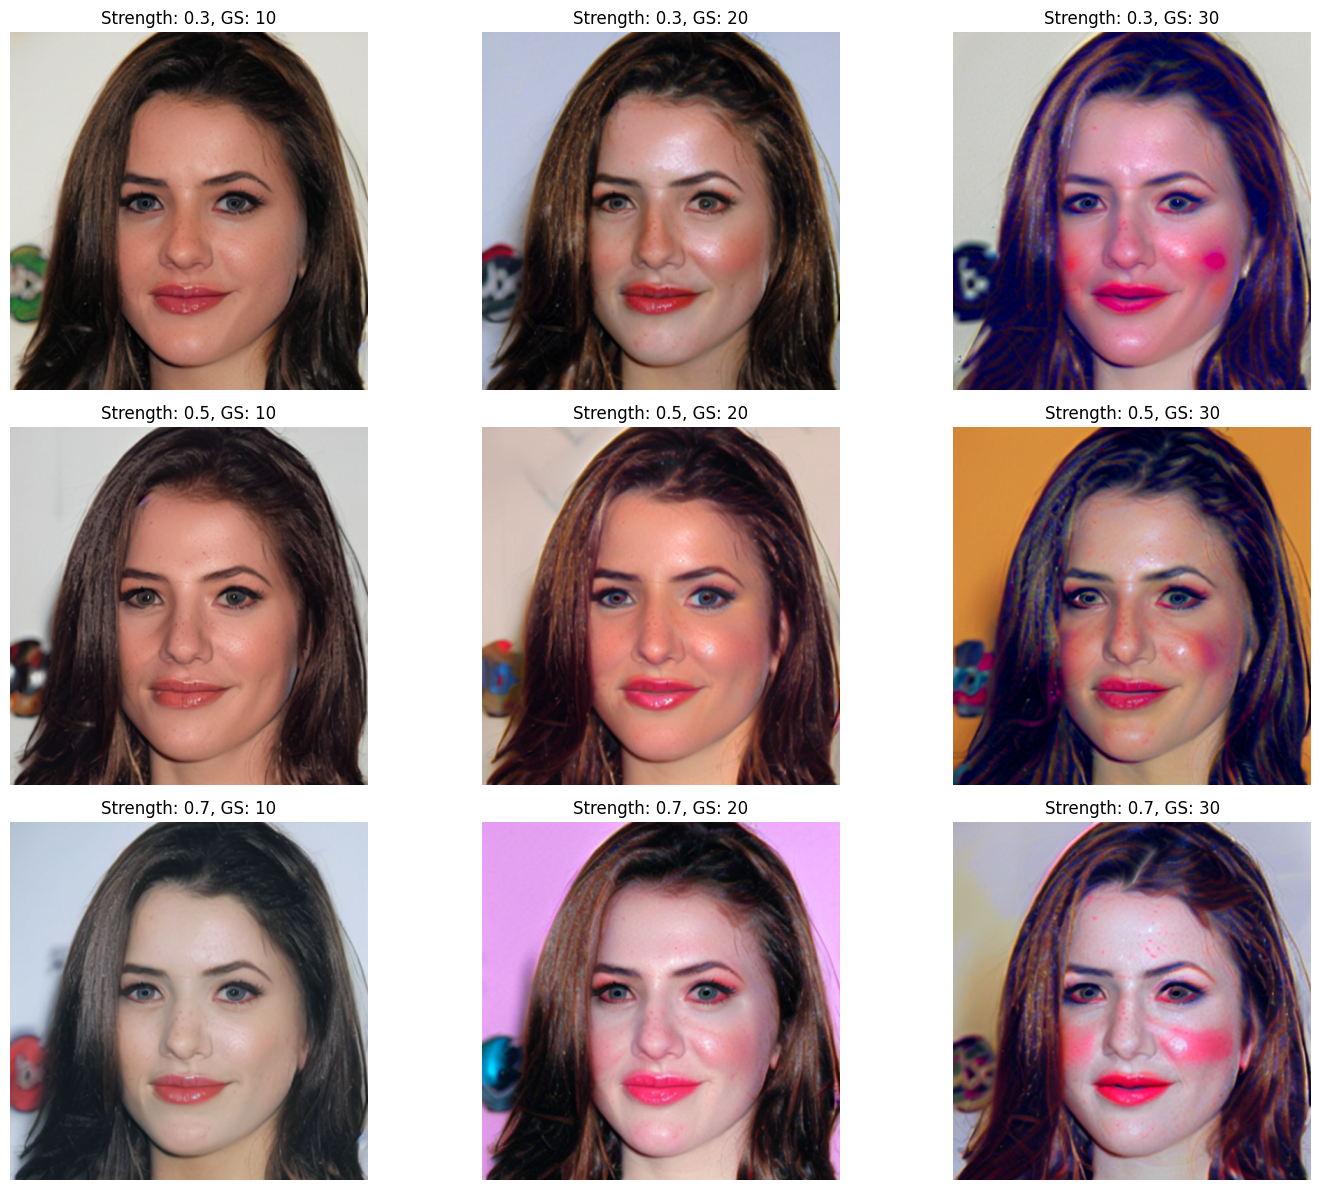

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the input image to RGB
image_path = "/content/217.jpg"
input_image = Image.open(image_path).convert("RGB")

# Define the prompt
prompt = "This person has arched eyebrows, high cheekbones, and rosy cheeks. She is wearing necklace, and lipstick. She is attractive."

# Hyperparameters to test
strength_values = [0.3, 0.5, 0.7]
guidance_scale_values = [10, 20, 30]

# Create a figure to display the images
fig, axes = plt.subplots(len(strength_values), len(guidance_scale_values), figsize=(15, 12))

# Loop over combinations of strength and guidance_scale
for i, strength in enumerate(strength_values):
    for j, guidance_scale in enumerate(guidance_scale_values):
        # Run the pipeline with the current combination of hyperparameters
        pipe.safety_checker = None
        images = pipe(prompt=prompt, image=input_image, strength=strength, guidance_scale=guidance_scale).images

        # Display the image for the current hyperparameter combination
        ax = axes[i, j]
        ax.imshow(images[0])
        ax.axis('off')  # Hide axes
        ax.set_title(f"Strength: {strength}, GS: {guidance_scale}")

# Adjust layout and display the images
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

# Load and convert the input image to RGB
image_path = "/content/327_sk.jpg"
input_image = Image.open(image_path).convert("RGB")  # Convert to 3-channel RGB

# Run the pipeline
prompt = "A young woman with an oval shaped face. Her hair is black and curly and she's got a fringe. Her eyes are blue and there is some black makeup around them. Her lips are full and they are painted red. Her lips are slightly parted and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.3, guidance_scale=15).images

# Save the generated image
images[0].save("OUTPUT1.png")


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "/content/drive/MyDrive/tuned_model"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

from PIL import Image



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Load the image properly
image_path = "/content/648.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A young woman with brown hair and small eyes with makeup around them. Her nose is small and her lips are thin. She is smiling and her upper teeth are visible."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.5, guidance_scale=50).images

# Save the generated image
images[0].save("OUTPUT1.png")

FileNotFoundError: [Errno 2] No such file or directory: '/content/648.jpg'

In [ ]:
# Load the image properly
image_path = "/content/29.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A woman with high cheekbones, a defined jawline and a small nose. She has full lips and light green eyes. She has blonde hair and is wearing makeup."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.4, guidance_scale=25).images

# Save the generated image
images[0].save("OUTPUT1.png")

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Load the image properly
image_path = "/content/subset_images/subset_sketches/657.jpg"
input_image = Image.open(image_path)

# Run the pipeline
prompt = "A man with large cheeks, thin lips and a long nose."
pipe.safety_checker = None

images = pipe(prompt=prompt, image=input_image, strength=0.5, guidance_scale=30).images

# Save the generated image
images[0].save("OUTPUT1.png")

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
!zip -r tuned_model_pixtopix.zip tuned_model_pixtopix



  adding: tuned_model_pixtopix/ (stored 0%)
  adding: tuned_model_pixtopix/scheduler/ (stored 0%)
  adding: tuned_model_pixtopix/scheduler/scheduler_config.json (deflated 47%)
  adding: tuned_model_pixtopix/unet/ (stored 0%)
  adding: tuned_model_pixtopix/unet/diffusion_pytorch_model.safetensors (deflated 7%)
  adding: tuned_model_pixtopix/unet/config.json (deflated 65%)
  adding: tuned_model_pixtopix/checkpoint-1100/ (stored 0%)
  adding: tuned_model_pixtopix/checkpoint-1100/scaler.pt (deflated 60%)
  adding: tuned_model_pixtopix/checkpoint-1100/unet/ (stored 0%)
  adding: tuned_model_pixtopix/checkpoint-1100/unet/diffusion_pytorch_model.safetensors (deflated 7%)
  adding: tuned_model_pixtopix/checkpoint-1100/unet/config.json (deflated 65%)
  adding: tuned_model_pixtopix/checkpoint-1100/optimizer.bin (deflated 9%)
  adding: tuned_model_pixtopix/checkpoint-1100/random_states_0.pkl (deflated 26%)
  adding: tuned_model_pixtopix/checkpoint-1100/scheduler.bin (deflated 55%)
  adding: tuned

In [ ]:
from google.colab import files
files.download('tuned_model_pixtopix.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive

# Try using drive._mount instead of drive.mount
drive._mount('/content/drive')

ValueError: mount failed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Define source and destination paths
source_path = '/content/tuned_model_pixtopix'
destination_path = '/content/drive/My Drive/tuned_model_f'

# Copy the directory to Google Drive
shutil.copytree(source_path, destination_path)
print("Model copied to Google Drive.")


Model copied to Google Drive.


In [ ]:
from diffusers import UNet2DConditionModel
from peft import PeftModel

# Path to your LoRA checkpoint directory
checkpoint_path = "./tuned_model/checkpoint-1000"

# Reload the base UNet model
unet = UNet2DConditionModel.from_pretrained(checkpoint_path)

# Reload the LoRA modifications (if they were applied during training)
unet = PeftModel.from_pretrained(unet, checkpoint_path)

# Now you can save the LoRA weights
output_dir = "./tuned_model/peft_lora_weights"
unet.save_pretrained(output_dir)
print(f"LoRA weights saved to {output_dir}")


OSError: Error no file named config.json found in directory ./tuned_model/checkpoint-1000.

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline

# Load the original model
base_model_id = "radames/stable-diffusion-v1-5-img2img"
base_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)

# Load your fine-tuned model
fine_tuned_model_id = "./tuned_model"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(fine_tuned_model_id, torch_dtype=torch.float16)

# Replace missing components
pipe.unet = base_pipe.unet

# Move to GPU
pipe = pipe.to("cuda")

# Test inference
from PIL import Image

input_image = Image.open("input_image.png").convert("RGB")
prompt = "A woman with high cheekbones, a defined jawline and a small nose. She has full lips and light green eyes. She has blonde hair and is wearing makeup."
output = pipe(prompt=prompt, image=input_image, strength=0.75, guidance_scale=7.5)
output.images[0].save("29_output.png")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

ValueError: Pipeline <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> expected {'scheduler', 'image_encoder', 'text_encoder', 'feature_extractor', 'vae', 'safety_checker', 'tokenizer', 'unet'}, but only {'scheduler', 'text_encoder', 'feature_extractor', 'vae', 'safety_checker', 'tokenizer'} were passed.

In [ ]:
from datasets import load_from_disk

# Load the dataset from disk
loaded_dataset = load_from_disk(output_path)

# Inspect the loaded dataset
print("Loaded Dataset:")
print(loaded_dataset)
print("Train examples:", len(loaded_dataset["train"]))
print("Test examples:", len(loaded_dataset["test"]))


Loaded Dataset:
DatasetDict({
    train: Dataset({
        features: ['response_id', 'description', 'image_filename', 'sketch_filename', 'sketch_file', 'face_file'],
        num_rows: 2236
    })
    test: Dataset({
        features: ['response_id', 'description', 'image_filename', 'sketch_filename', 'sketch_file', 'face_file'],
        num_rows: 560
    })
})
Train examples: 2236
Test examples: 560


In [ ]:
from datasets import load_from_disk

dataset = load_from_disk("./processed_subset_dataset")


In [ ]:
ls ./processed_subset_dataset


dataset_dict.json  test/  train/


In [ ]:
# Inspect the dataset to ensure it loaded correctly
print(dataset)
print("Train samples:", len(dataset["train"]))
print("Test samples:", len(dataset["test"]))

DatasetDict({
    train: Dataset({
        features: ['response_id', 'description', 'image_filename', 'sketch_filename', 'sketch_file', 'face_file'],
        num_rows: 2236
    })
    test: Dataset({
        features: ['response_id', 'description', 'image_filename', 'sketch_filename', 'sketch_file', 'face_file'],
        num_rows: 560
    })
})
Train samples: 2236
Test samples: 560


In [ ]:
import os
dataset = load_from_disk("./processed_subset_dataset")

for row in dataset["train"]:
    assert os.path.exists(row["sketch_file"]), f"Missing file: {row['sketch_file']}"
    assert os.path.exists(row["face_file"]), f"Missing file: {row['face_file']}"


In [ ]:
print("Train dataset size:", len(split_dataset["train"]))
print("Test dataset size:", len(split_dataset["test"]))


Train dataset size: 2236
Test dataset size: 560


In [ ]:
from datasets import load_from_disk

dataset_path = "./processed_subset_dataset"
dataset = load_from_disk(dataset_path)

# Check the structure
print(dataset)

# Inspect the "train" split
print("Train dataset size:", len(dataset["train"]))
print("Columns in the train dataset:", dataset["train"].column_names)

# Print a few examples from the "train" split
print(dataset["train"][0])


DatasetDict({
    train: Dataset({
        features: ['response_id', 'description', 'image_filename', 'sketch_filename', 'sketch_file', 'face_file'],
        num_rows: 2236
    })
    test: Dataset({
        features: ['response_id', 'description', 'image_filename', 'sketch_filename', 'sketch_file', 'face_file'],
        num_rows: 560
    })
})
Train dataset size: 2236
Columns in the train dataset: ['response_id', 'description', 'image_filename', 'sketch_filename', 'sketch_file', 'face_file']
{'response_id': 31959, 'description': 'A man with black hair and eyebrows, blue eyes, small nose, thin lips and a stubble.', 'image_filename': '11632.jpg', 'sketch_filename': '11632.jpg', 'sketch_file': './subset_sketches/11632.jpg', 'face_file': './subset_images/11632.jpg'}


In [ ]:
from datasets import load_from_disk

dataset = load_from_disk(args.train_data_dir)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


NameError: name 'args' is not defined